## PREDICTING FUTURE PRICE USING FACEBOOK PROPHET
- Prophet is an open source tool used for time series forecasting.
- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality plus holiday effects.
- Prophet works best with time series that have strong seasonal effects and several seasons of historical data.
- Prophet works with missing data with several outlier.
- User can tweak forecast by manually adding domain specific knowledge.

### Import libraries and dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

### [Data Source](https://www.kaggle.com/datasets/neuromusic/avocado-prices) and column explaination


- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [55]:
# read df 
avocado_df = pd.read_csv(r"D:\Dataset\Jupyter\FBProphet\avocado.csv")
#print sample 5
avocado_df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7414,49,2017-01-22,0.54,1601222.68,909748.65,296612.15,15561.81,379300.07,98982.80,280317.27,0.0,conventional,2017,PhoenixTucson
13061,36,2016-04-17,1.34,20001.54,2830.14,13556.57,0.00,3614.83,347.32,3267.51,0.0,organic,2016,LasVegas
1559,51,2015-01-04,1.09,3759282.62,126640.65,2860709.93,7580.38,764351.66,669970.50,94381.16,0.0,conventional,2015,Northeast
16468,31,2017-05-28,2.22,15955.26,2251.74,6632.02,7.74,7063.76,7043.24,20.52,0.0,organic,2017,Philadelphia
9936,30,2015-05-31,1.65,79819.77,3599.67,58929.65,0.00,17290.45,12356.85,4933.60,0.0,organic,2015,GreatLakes


### Exploratory Data Analysis

In [56]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [57]:
# Check for non null, data type and data point count
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [58]:
# checking null data point in columns
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: xlabel='Date', ylabel='AveragePrice'>

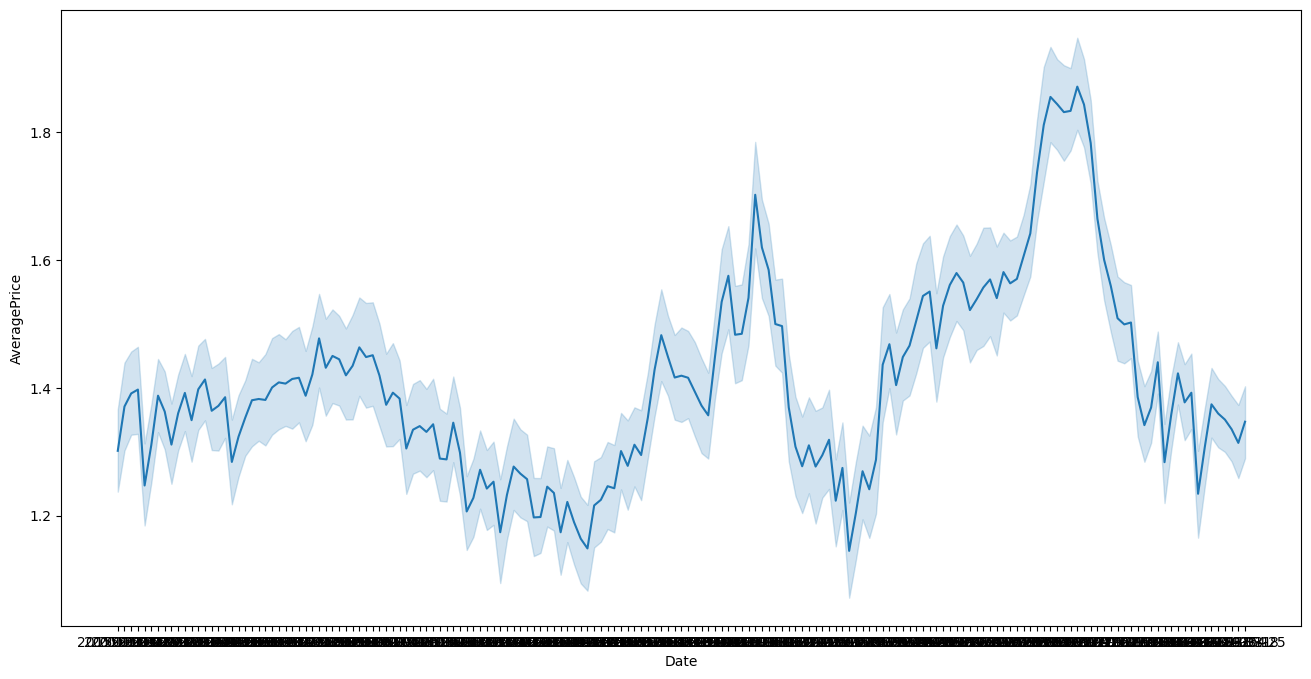

In [59]:
avocado_df = avocado_df.sort_values('Date')

# Plot date and AveragePrice
plt.figure(figsize=(16,8))
sns.lineplot(x = "Date", y = "AveragePrice", data = avocado_df)

C:\Users\trilo\AppData\Local\Temp\ipykernel_9412\544501455.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado_df.AveragePrice, color = 'b')


<Axes: xlabel='AveragePrice', ylabel='Density'>

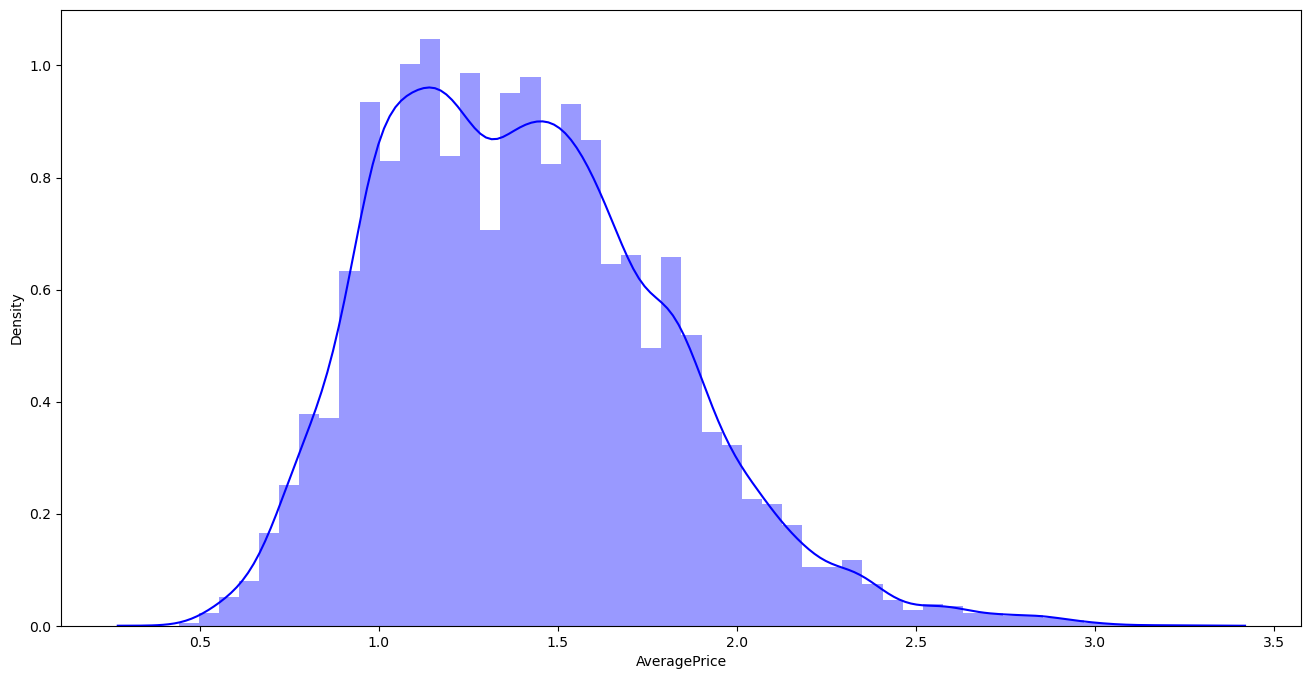

In [60]:
# distribution plot of the average price
plt.figure(figsize=(16,8))
sns.distplot(avocado_df.AveragePrice, color = 'b')

<Axes: xlabel='year', ylabel='count'>

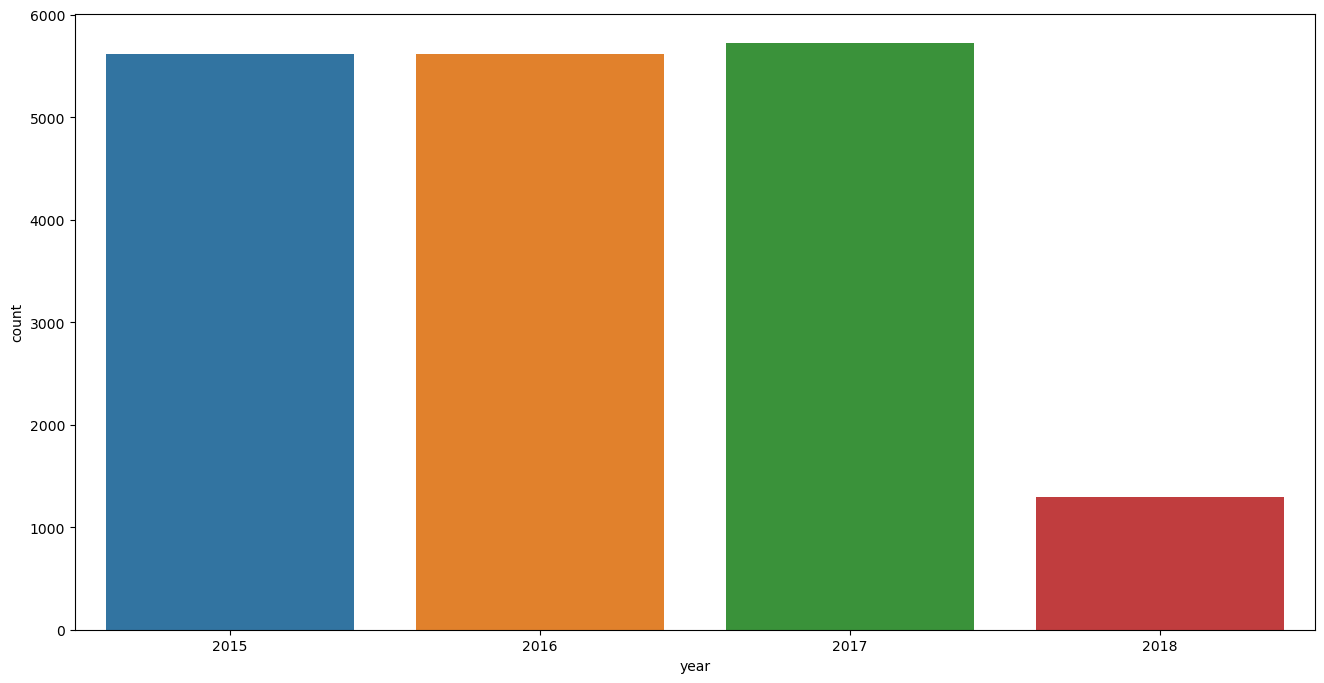

In [61]:
# Bar chart to count in every year
plt.figure(figsize=(16,8))
sns.countplot(x = 'year', data = avocado_df)


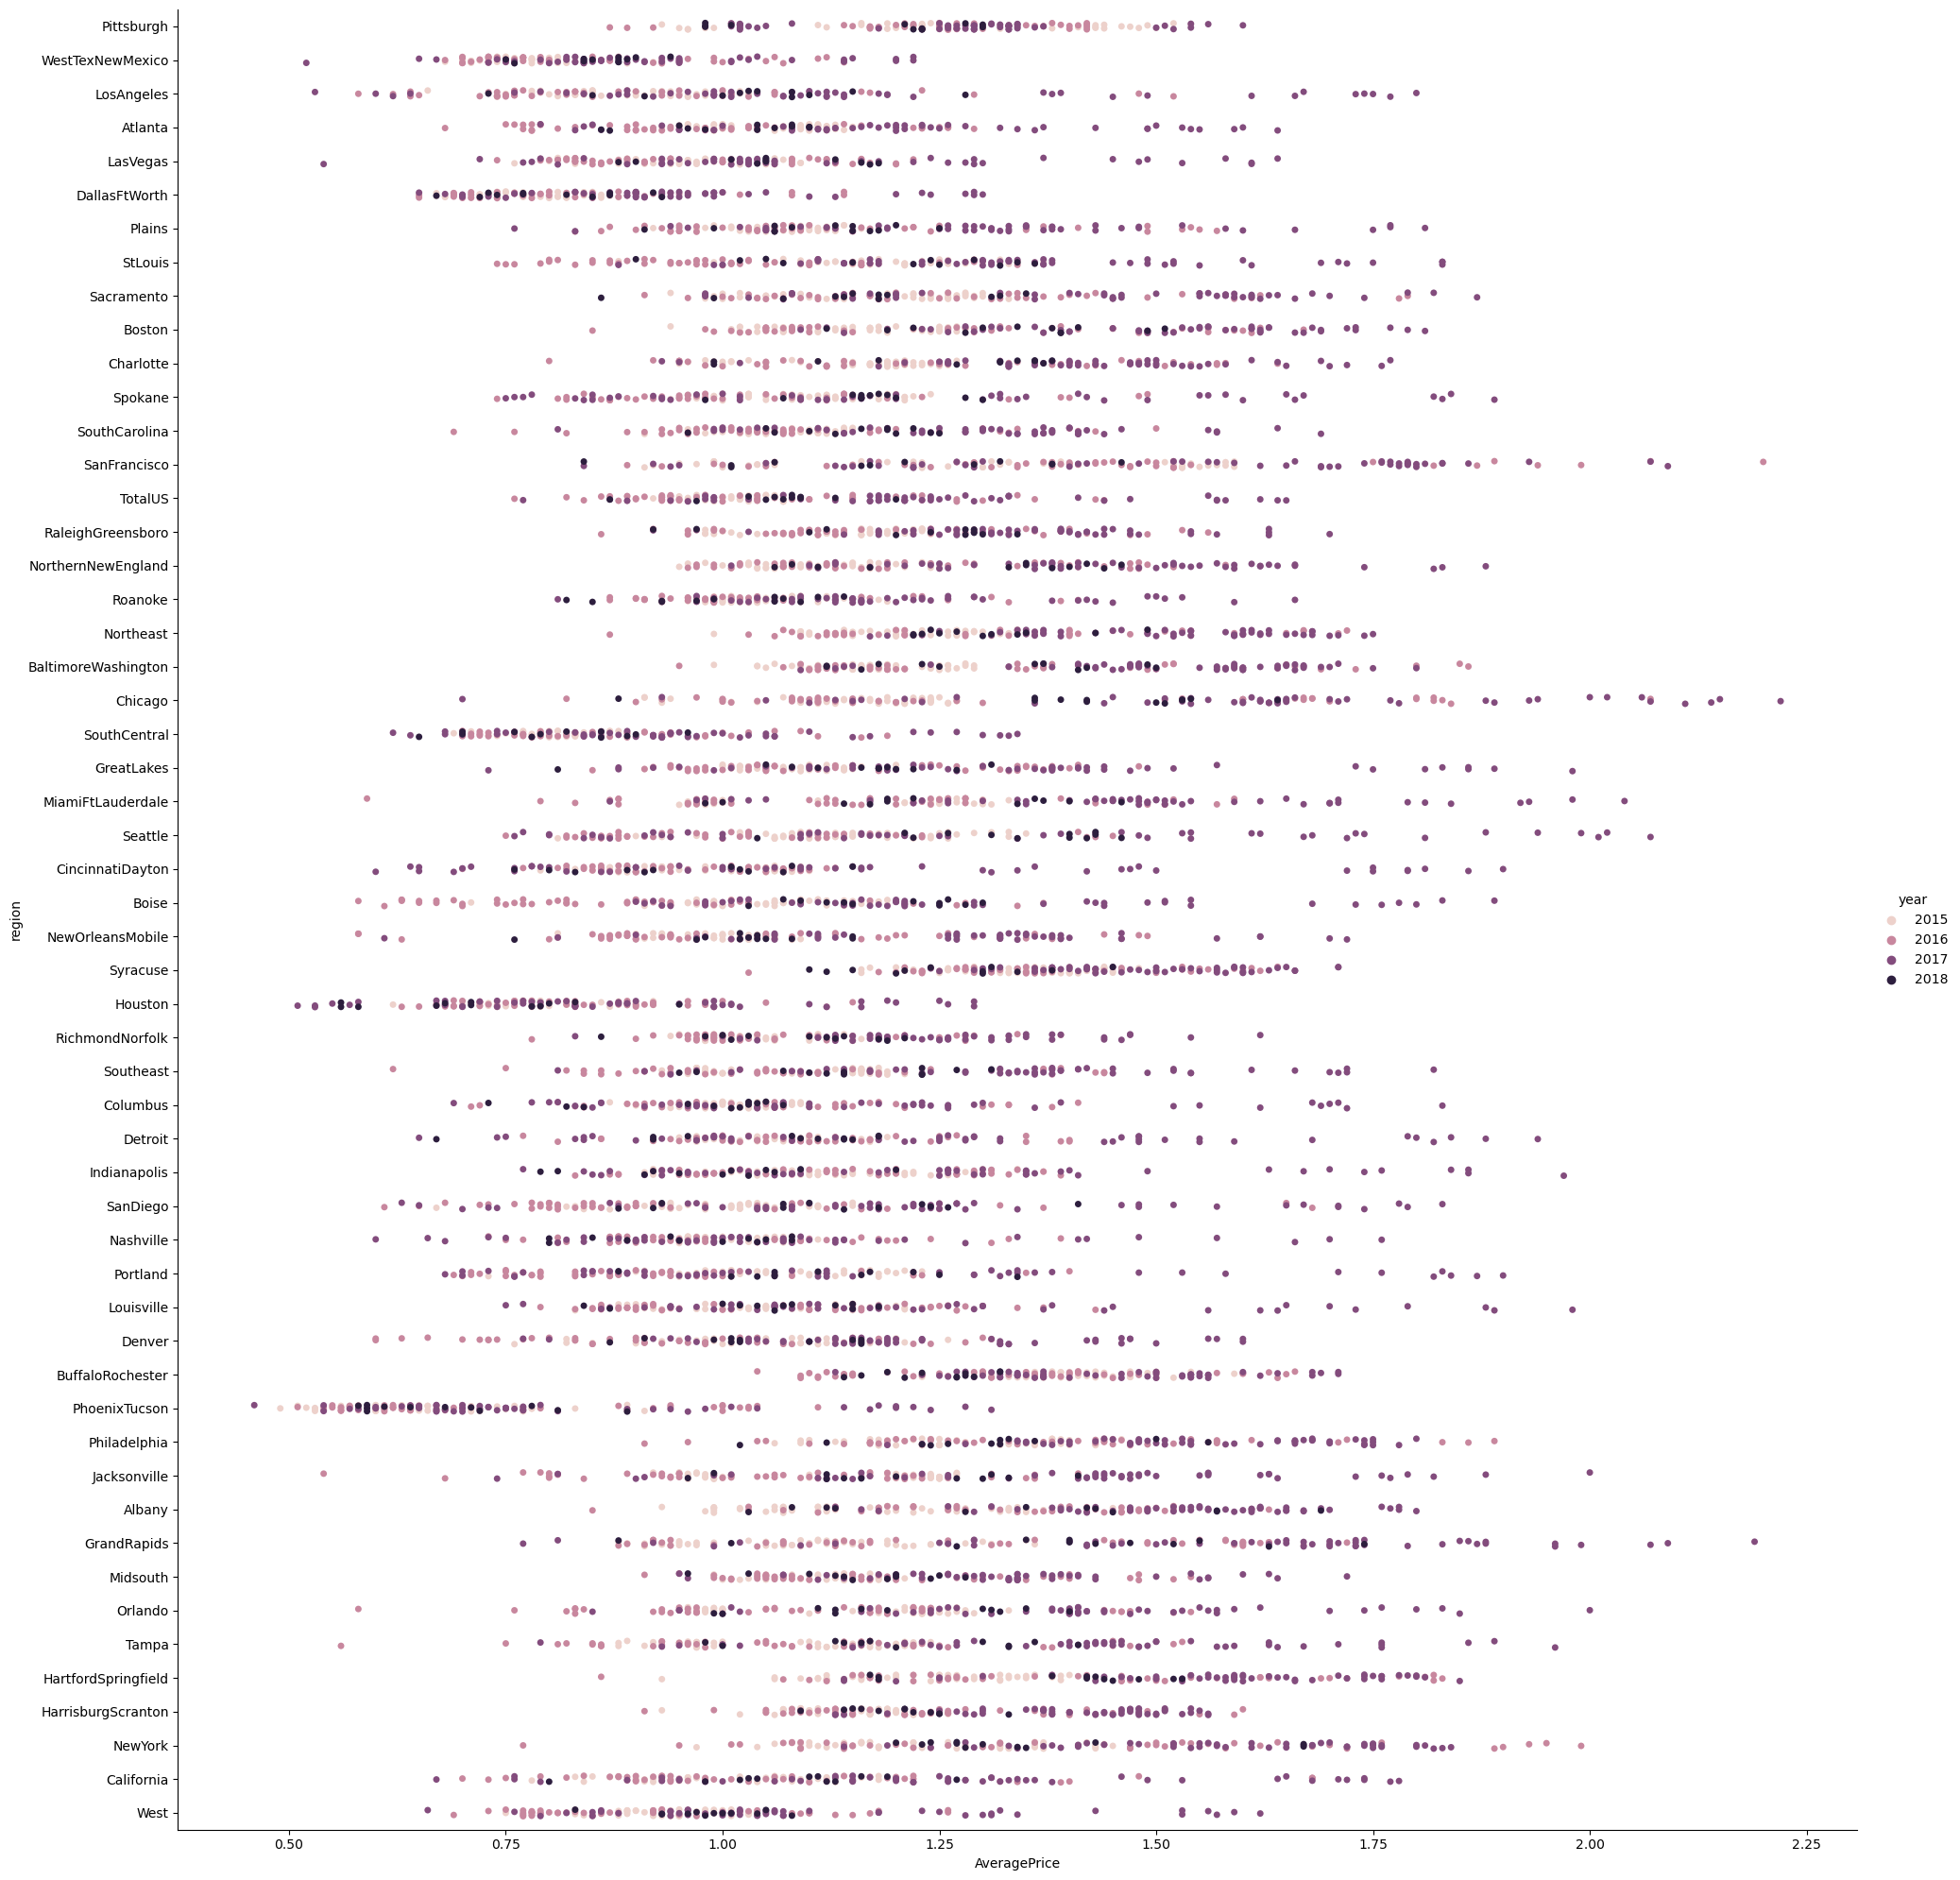

In [72]:
# plot the avocado avg price vs regions for conventional avocados
conventional = sns.catplot(data = avocado_df[avocado_df['type']=='conventional'], 
                           x = 'AveragePrice', y = 'region',hue = 'year', height = 20)

### Data Preparation Before Applying FB Prophet

In [27]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})
avocado_prophet_df.sample(5)

,ds,y
14008,2016-01-31,1.33
10914,2015-08-09,1.47
2113,2015-05-10,1.14
9140,2015-09-20,1.98
8396,2017-07-16,1.28


### Develop Model and Forecast - With whole data

In [28]:
m = Prophet()
m.fit(avocado_prophet_df)

18:55:43 - cmdstanpy - INFO - Chain [1] start processing
18:55:50 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Forecast the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498484,0.892774,1.874504,1.498484,1.498484,-0.113572,-0.113572,-0.113572,-0.113572,-0.113572,-0.113572,0.0,0.0,0.0,1.384912
1,2015-01-11,1.493323,0.890214,1.873368,1.493323,1.493323,-0.105114,-0.105114,-0.105114,-0.105114,-0.105114,-0.105114,0.0,0.0,0.0,1.388209
2,2015-01-18,1.488162,0.891246,1.867659,1.488162,1.488162,-0.104772,-0.104772,-0.104772,-0.104772,-0.104772,-0.104772,0.0,0.0,0.0,1.383390
3,2015-01-25,1.483001,0.890002,1.839605,1.483001,1.483001,-0.123726,-0.123726,-0.123726,-0.123726,-0.123726,-0.123726,0.0,0.0,0.0,1.359275
4,2015-02-01,1.477839,0.832722,1.820066,1.477839,1.477839,-0.152103,-0.152103,-0.152103,-0.152103,-0.152103,-0.152103,0.0,0.0,0.0,1.325736
5,2015-02-08,1.472678,0.835111,1.825079,1.472678,1.472678,-0.166396,-0.166396,-0.166396,-0.166396,-0.166396,-0.166396,0.0,0.0,0.0,1.306282
6,2015-02-15,1.467517,0.832017,1.787910,1.467517,1.467517,-0.152990,-0.152990,-0.152990,-0.152990,-0.152990,-0.152990,0.0,0.0,0.0,1.314527
7,2015-02-22,1.462356,0.884980,1.805322,1.462356,1.462356,-0.122143,-0.122143,-0.122143,-0.122143,-0.122143,-0.122143,0.0,0.0,0.0,1.340213
8,2015-03-01,1.457195,0.843729,1.866517,1.457195,1.457195,-0.096841,-0.096841,-0.096841,-0.096841,-0.096841,-0.096841,0.0,0.0,0.0,1.360353
9,2015-03-08,1.452034,0.891896,1.824335,1.452034,1.452034,-0.089234,-0.089234,-0.089234,-0.089234,-0.089234,-0.089234,0.0,0.0,0.0,1.362800


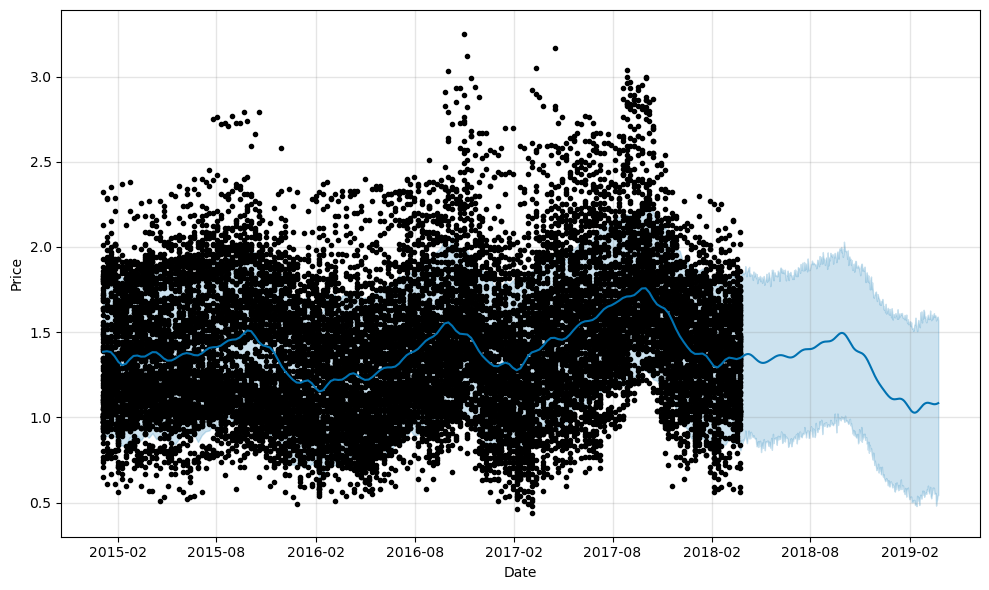

In [32]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

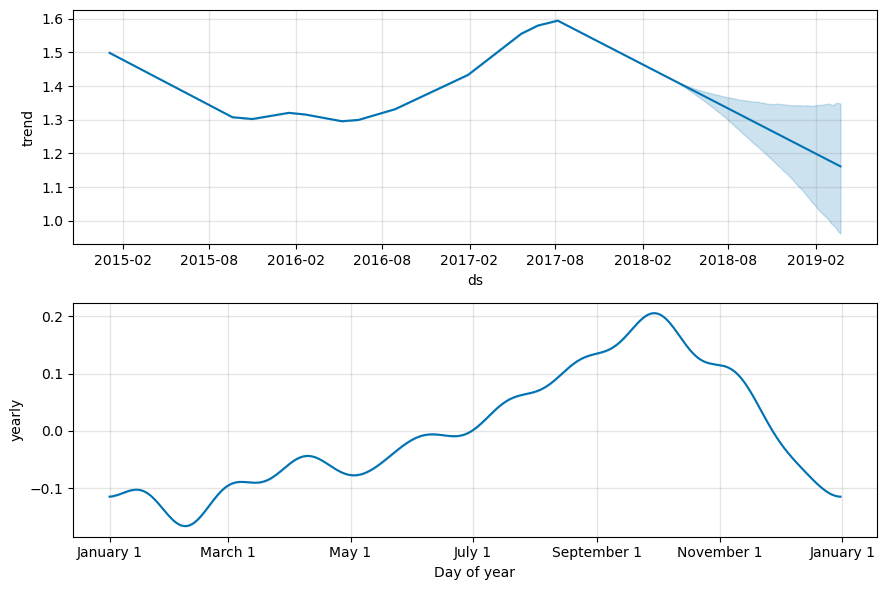

In [33]:
figure2 = m.plot_components(forecast)

### Develop Model and Forecast - With region specific

In [36]:
avocado_df_sample = avocado_df[avocado_df['region'] == 'West'].sort_values('Date')
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West


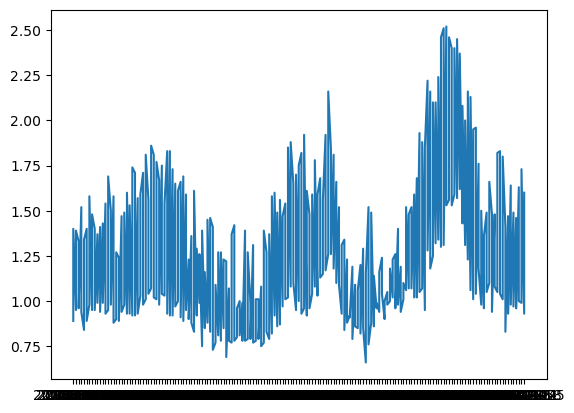

In [37]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [38]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

In [39]:
m = Prophet()
m.fit(avocado_df_sample)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:22 - cmdstanpy - INFO - Chain [1] done processing


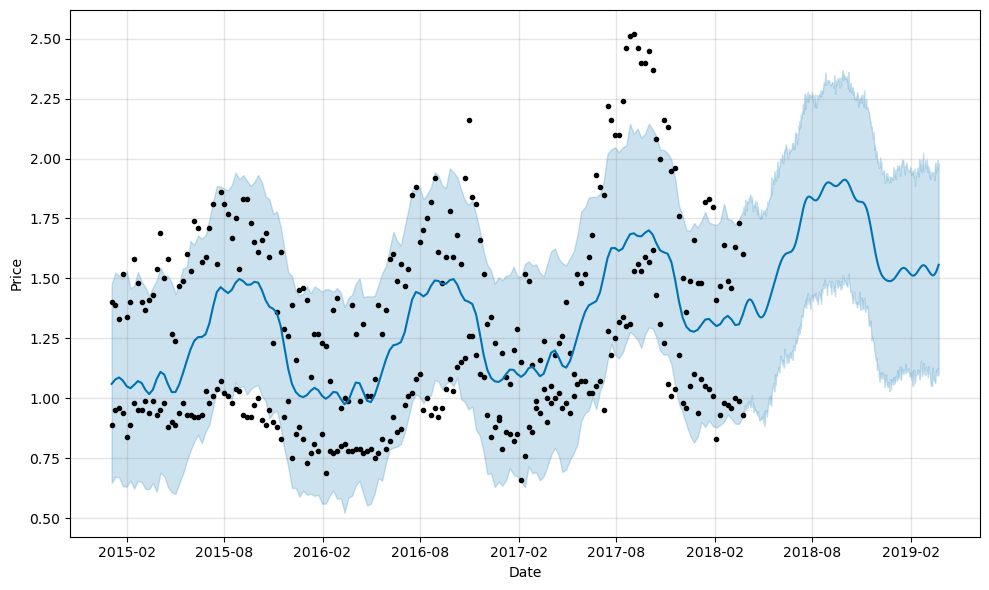

In [40]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

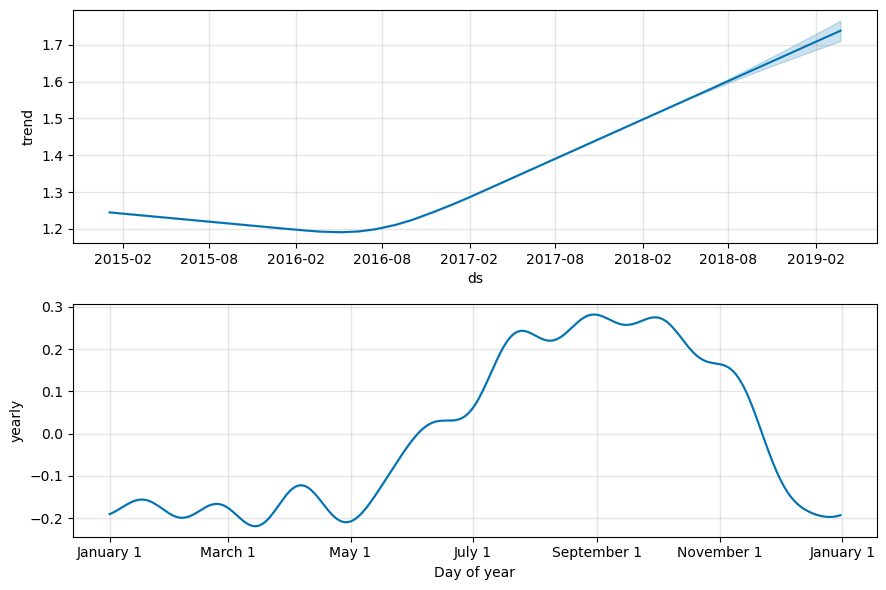

In [41]:
figure1 = m.plot_components(forecast)